# EDA TELCO CUSTOMERS CHURN

The Dataset Used in this project is taken from Kaggle. Exploratory data analysis consists of analyzing the main characteristics of a data set usually by means of visualization methods and summary statistics. The objective is to understand the data, discover patterns and anomalies, and check assumptions before performing further evaluations.

The main Idea of this project is to deep dive some factors that affect customers churn the most.

At first, we do data cleaning such missing value and duplicated rows handling. Next we basic Statistical Summary.

# Import Libraries


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder

# Load Data

In [ ]:
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [ ]:
data = data.loc[~data['TotalCharges'].str.contains(' ')]

#  Preliminary Look and Data Cleansing

## Sample of data

In [ ]:
# Showing top 5 rows of the data
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# sample 5 rows of the data
data.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6542,3315-TOTBP,Male,0,No,No,15,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,76.00,1130.85,Yes
1930,2792-VPPET,Male,0,No,No,3,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,20.50,76.95,No
6553,4891-NLUBA,Female,0,Yes,Yes,61,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),61.45,3751.15,No
4859,8041-TMEID,Male,1,Yes,No,63,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Two year,No,Credit card (automatic),108.50,6991.9,No
6098,4700-UBQMV,Male,0,Yes,Yes,21,Yes,Yes,DSL,Yes,...,No,No,Yes,Yes,One year,Yes,Bank transfer (automatic),75.90,1549.75,No


Observations :

1.   The identifier of the dataset is `customerID`. 
2.   No obvious defect on the data (column name vs its entries), all looks good.



## General Information

In [ ]:
data.shape

(7032, 21)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [ ]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Observations:

1. Our Data contains 7032 rows and 21 columns
2. There are no missing values on first look, but we will take another look later.
3. `TotalCharges` dtypes should be numeric, we will change it later.
4. From the column name, it looks like our Data doesn't have any duplicated columns.

In [ ]:
# ‘Total Charges’ should be numeric.
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].dtype

dtype('float64')

## Handling Missing Value and Duplicated Rows

In [ ]:
# Number of missing values per column
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

We don't have any missing values at our data.

In [ ]:
# number of duplicated data
data.duplicated().sum()

0

We also don't have any duplicated rows.

# Data Understanding

## Statistical summary

In [ ]:
# Grouping columns based on column dtypes

data_numerical = data.select_dtypes(include=["int","float"])
data_numerical.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [ ]:
data_numerical.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Observation:
1. `SeniorCitizen` column is a boolean/binary column
2. The minimum and maximum values make sense for each column
3. Mean ~ 50% (Median) in `Tenure` and `MonthlyCharges` column, indicating somewhat a symmetrical distribution
4. Mean > 50% (Median) in `TotalCharges`, indicating positively skewed distribution

In [ ]:
data_categorical = data.select_dtypes(exclude=["int","float"])
data_categorical.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [ ]:
data_categorical.describe()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


Observations:
1. Again, we can see that `customerID` is the unique key.
2. Some of Our Categorical columns have 2 unique values and another have 3 unique values, and only 1 columns that have more than 3 unique values.

In [ ]:
# showing the precise value counts
for col in data_categorical:
  print(f"Value counts of {col} column")
  print(data_categorical[col].value_counts(), '\n')

Value counts of customerID column
7590-VHVEG    1
0265-PSUAE    1
2956-GGUCQ    1
6008-NAIXK    1
5956-YHHRX    1
             ..
7874-ECPQJ    1
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
3186-AJIEK    1
Name: customerID, Length: 7032, dtype: int64 

Value counts of gender column
Male      3549
Female    3483
Name: gender, dtype: int64 

Value counts of Partner column
No     3639
Yes    3393
Name: Partner, dtype: int64 

Value counts of Dependents column
No     4933
Yes    2099
Name: Dependents, dtype: int64 

Value counts of PhoneService column
Yes    6352
No      680
Name: PhoneService, dtype: int64 

Value counts of MultipleLines column
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64 

Value counts of InternetService column
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64 

Value counts of OnlineSecurity column
No                     3497
Yes                    2015
No i

1. "No Internet Values" have the same number of values at our 6 columns.
2. "Month to Month" contract is quite dominant.

# Univariate Analysis

## Boxplot to detect outliers

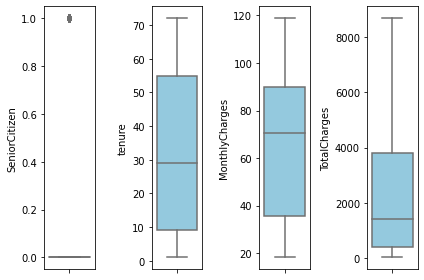

In [ ]:
features = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=data[features[i]], color='skyblue')
    plt.tight_layout()

Observation:
1. `SeniorCitizen` column is a boolean/binary column
2. There is no Outlier.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

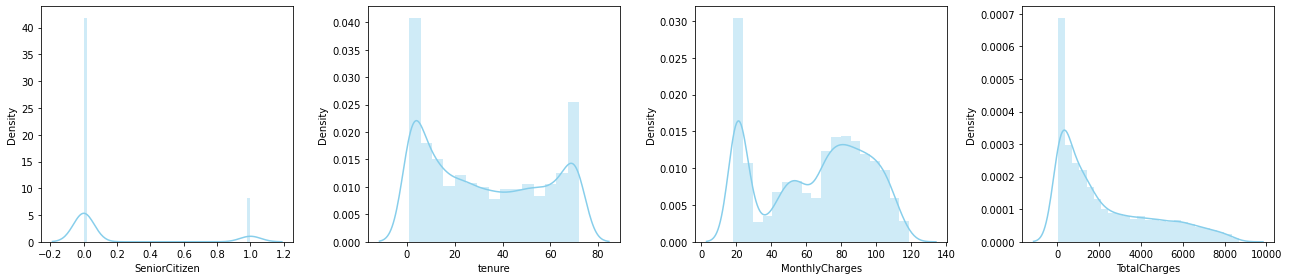

In [ ]:
features = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
plt.figure(figsize=(18,4))
for i in range(0, len(features)):
    #plt.subplot(2, len(features)//2, i+1)
    plt.subplot(1, len(features), i+1)
    sns.distplot(x=data[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

Observations:
1. `TotalCharges` is positively skewed, it has long tail on the right
2. `Tenure` and `MonthlyCharges` are somewhat bimodal in distribution

# Bivariate Analysis

In [ ]:
# remember the dataset
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


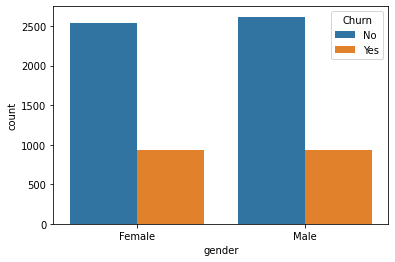

In [ ]:
# Gender vs Churn
sns.countplot(data=data,
            x='gender',
            hue='Churn')

Looks like gender has nothing to do with the probs of churn.

In [ ]:
data_categorical.columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

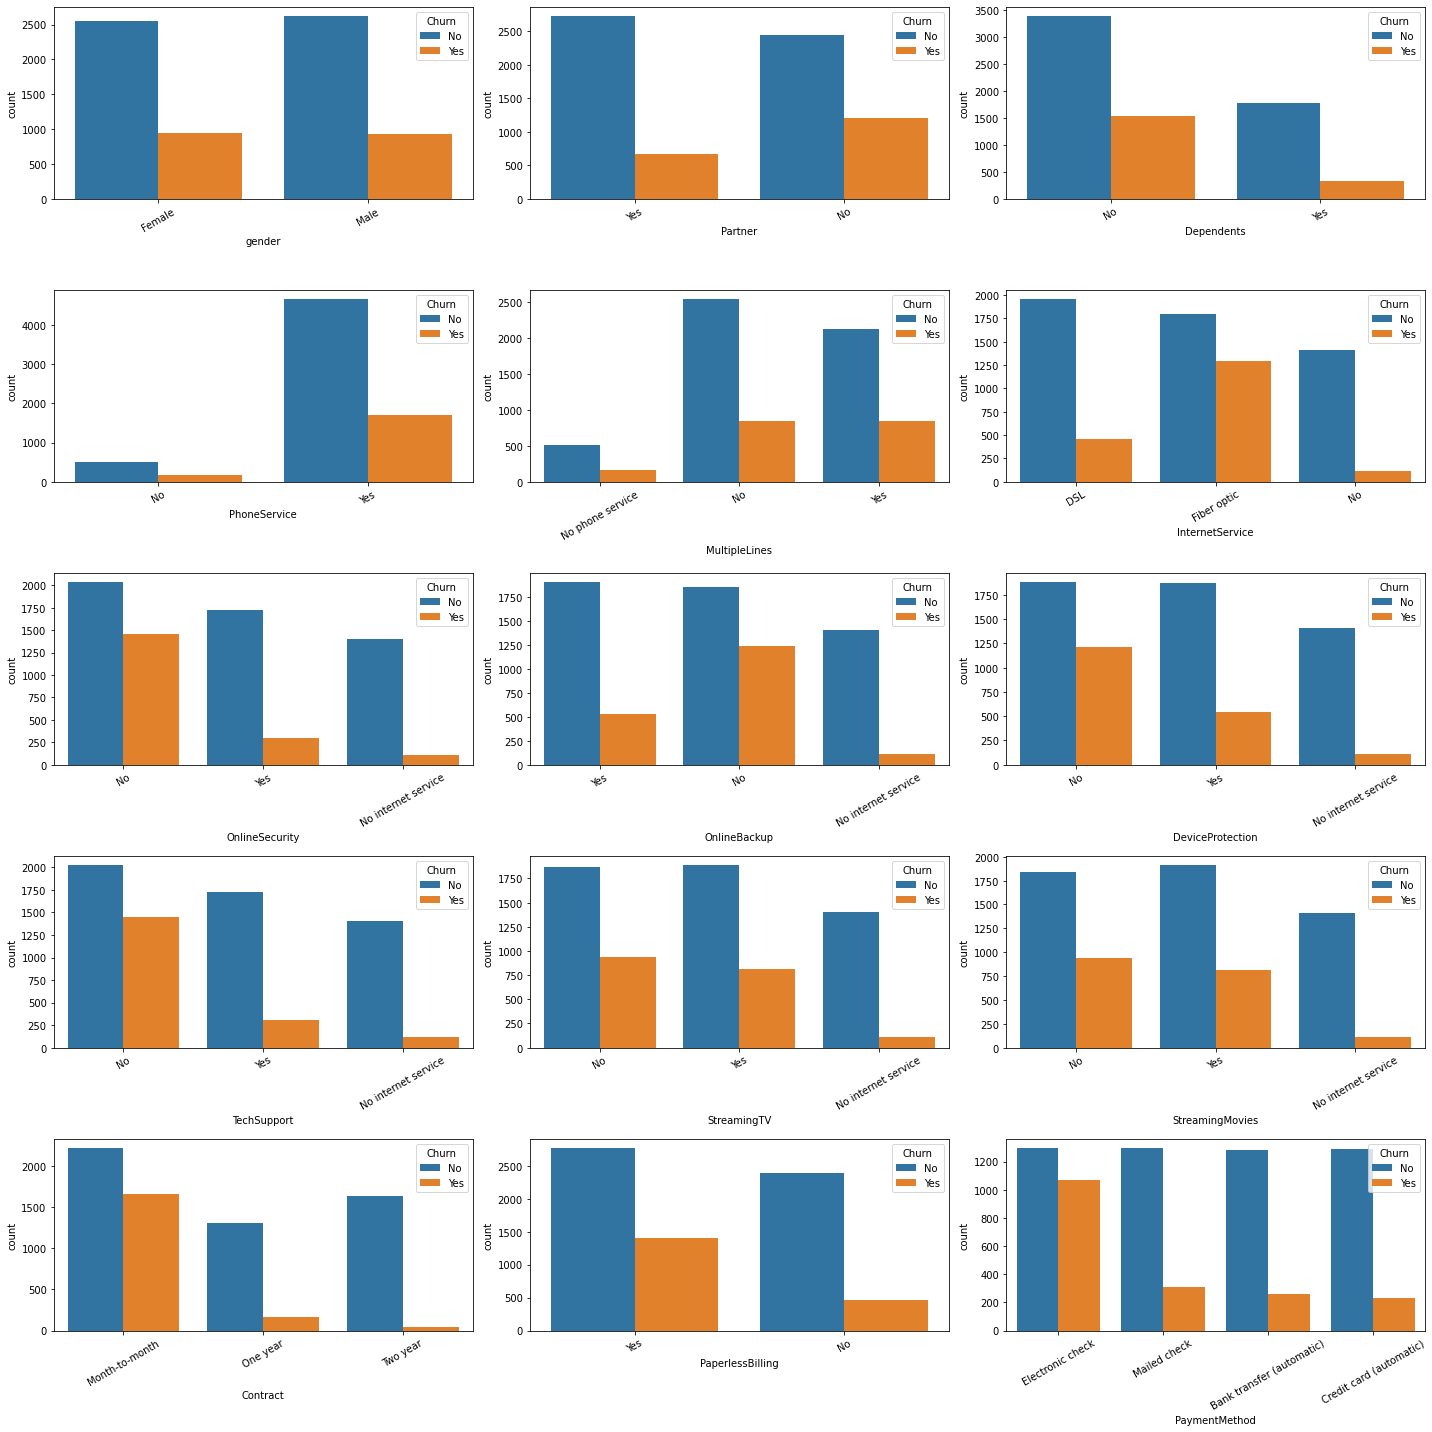

In [ ]:
features =['gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'] #exclude customerID and Churn
plt.figure(figsize=(20,20))
for i in range(0, len(features)):
    plt.subplot(5, 3, i+1)
    sns.countplot(data=data,
            x=features[i],
            hue='Churn')
    plt.xticks(rotation=30)
    plt.tight_layout()

Observations:
1. Looks like gender has nothing to do with the probs of churn.
2. Customer without Partner is more likely to churn
3. Customer without dependents is more likely to churn
4. Some of the Customer has no phone service
5. Multiple Lines somewhat has nothing to do with the probs of churn.
6. Customer with Fiber Optic is more likely to churn
7. Customer without 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport' is more likely to churn.
8. Streaming TV and Movies did not really affect the probablity of churn.
9. Customer with Month-to-Month  contract is more likely to churn
10. Customer with PaperlessBilling is more likely to churn
11. Customer with electronic check payment method is more likely to churn

# Multivariate Analysis

## Heatmap to show correlation

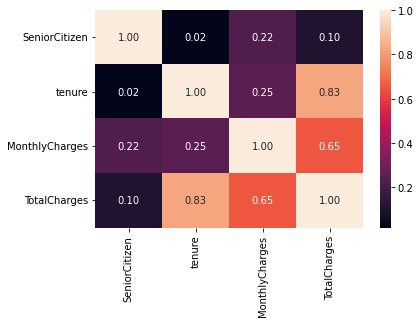

In [ ]:
# correlation heatmap
correlation = data.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

Observation:
1. `tenure` and `TotalCharges` are highly correlated each other, with **0.83**.
2. `MonthlyCharges` and `TotalCharges` have high correlation to, but it is not that high, won't make the feature redundant.

## Pairplot

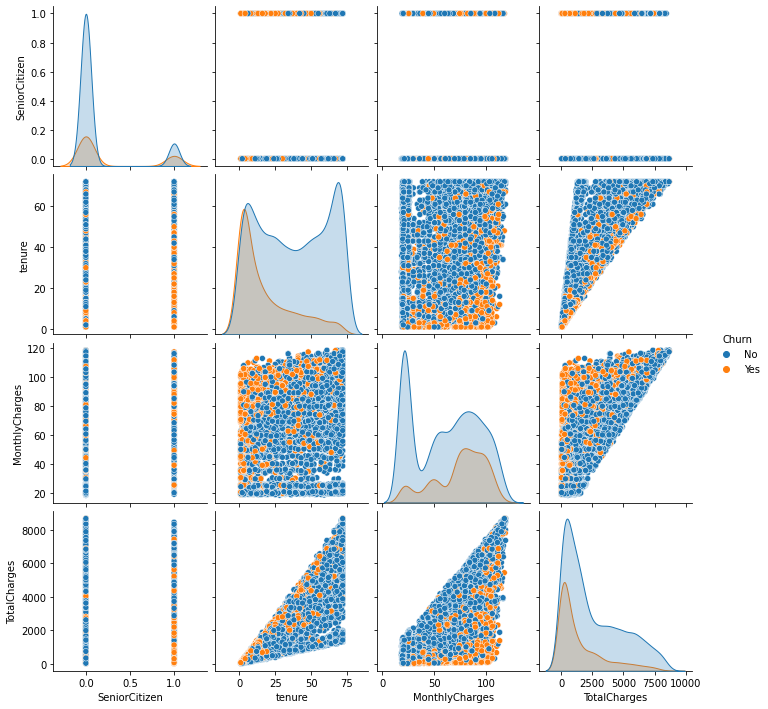

In [ ]:
sns.pairplot(data, hue='Churn')

Observations:
1. Customer with High `MonthlyCharges` and low `tenure` is more likely to churn.
2. Customer with low `tenure` is new customer and tend to churn.
3. Many `SeniorCitizen` with low `TotalCharges` is tend to churn.
4. Many `SeniorCitizen` with low `tenure` is tend to churn.

# STANDARD EDA CONCLUSION

1. No obvious defect on the data (column name vs its entries), all looks good.
2. We can see that `customerID` is the unique key. Later for modelling we can drop this column because it's meaningless.
3. There is no Outlier in our Data.
4. `TotalCharges` is positively skewed, it has long tail on the right.
5. Customer without 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport' is more likely to churn.
6. Customer with Month-to-Month  contract is more likely to churn.
7. `tenure` and `TotalCharges` are highly correlated each other, with **0.83**.
8. Customer with High `MonthlyCharges` and low `tenure` is more likely to churn.


# Deep Dive Exploration



## EDA Questions

1.  Customer Churn by Tenure, TotalCharges, and Contract type.
2.  Contract VS MonthlyCharges.
3.  Tenure VS Churn
4.  Partner, Dependants, and Churn.
5.  Service features

### Customer Churn by Tenure, TotalCharges, and Contract type.

In [ ]:
fig = px.scatter(x=data['tenure'], y=data['TotalCharges'], 
                 color = data['Churn'], template = 'presentation', 
                 opacity = 0.5, facet_col = data['Contract'], 
                 title = 'Customer Churn by Tenure, Charges, and Contract Type',
                 labels = {'x' : 'Customer Tenure', 'y' : 'Total Charges $'})
                
fig.show()

1. Notice that most churn can be seen in the contracts that are “Month-to-Month”. Makes sense, ofcourse. 
2. Also, we can see that as the tenure increases and so are the total charges, the likelihood of customers with high tenure and low charges is less compared to customers with high tenure and high charges.

### Contract VS MonthlyCharges.

In [ ]:
contract_type =(data
                .groupby(['Contract'])
                .agg(charges=('MonthlyCharges','mean'))
                .reset_index())
contract_type.head()

,Contract,charges
0,Month-to-month,66.398490
1,One year,65.079416
2,Two year,60.872374


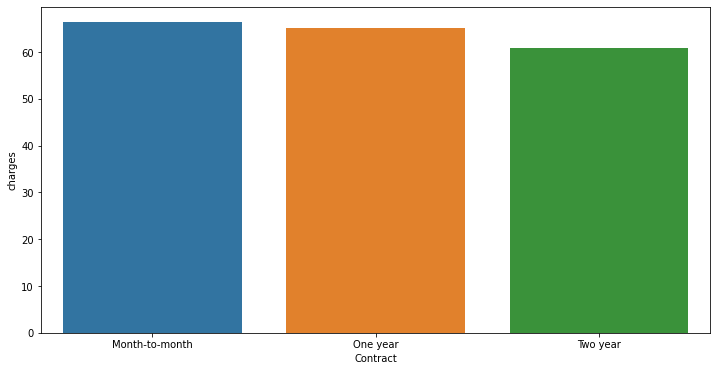

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=contract_type,
            x='Contract',
            y='charges')

There is no significant difference from the average monthly charges if it is considered based on the contract.

### Tenure VS Churn

In [ ]:
# Let's convert tenure column to tenure range/buckets to get better insight

def convert_to_buckets(tenure):
    
    if tenure <=24:
        return '0 - 24 months'
    elif tenure <=36:
        return '24 - 36 months'
    elif tenure <=48:
        return '36 - 48 months'
    elif tenure <=60:
        return '48 - 60 months'
    else:
        return '> 60 months'


In [ ]:
# Copying data for this section
data2 = data.copy()

In [ ]:
data2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data2['tenure']=data2['tenure'].map(convert_to_buckets)
data2['tenure'].value_counts()

0 - 24 months     3199
> 60 months       1407
24 - 36 months     832
48 - 60 months     832
36 - 48 months     762
Name: tenure, dtype: int64

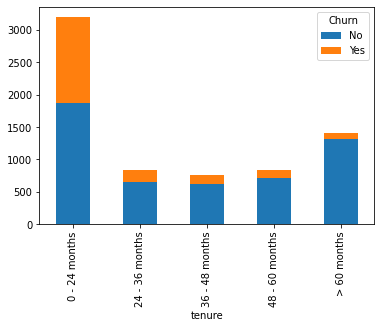

In [ ]:
data2.groupby(['tenure','Churn']).size().unstack().plot(kind='bar',stacked=True);

1. Customers with 0-24 months tenure are more likely to churn. So this is new customers, later by modelling, we need to find out why new customers tend to churn.
2. From the plot, it is evident that 'tenure' is an important feature as well.

### Partner, Dependants, and Churn.

In [ ]:
#Label encoding Churn to use sns.barplot, we will use our copied data
le = LabelEncoder()
data2['Churn'] = le.fit_transform(data2['Churn'])
data2['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [ ]:
data2.groupby(by=['Partner', 'Dependents'])['Churn'].value_counts(normalize = True)

Partner  Dependents  Churn
No       No          0        0.657622
                     1        0.342378
         Yes         0        0.785515
                     1        0.214485
Yes      No          0        0.745917
                     1        0.254083
         Yes         0        0.856897
                     1        0.143103
Name: Churn, dtype: float64

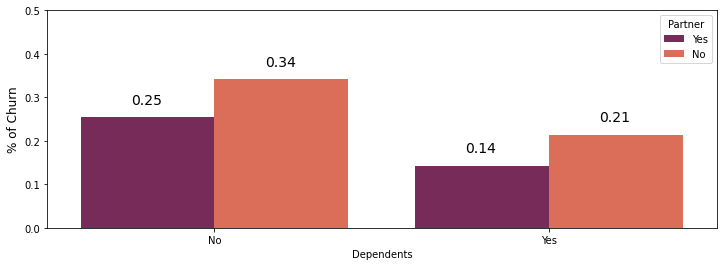

In [ ]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "Dependents", y = "Churn", hue = "Partner", data = data2, palette = 'rocket', ci = None)

plt.ylabel("% of Churn", fontsize= 12)
plt.ylim(0,0.5)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.15, p.get_height()+0.03),fontsize=14)

plt.show()

1. We can see that both features contribute to the likelihood of churn. 
2. The group of people with partners and dependents and the group with neither of those are on the extremes in terms of likelihood of churn (14% and 34%, respectively). 
3. The churn of customers with partners and without dependents falls close to the overall percentage of churn in our dataset, while the ‘opposite’ group still have a lower chance of it.

### Service features
'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup' , 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'

In [ ]:
serv_features = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup'
                , 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

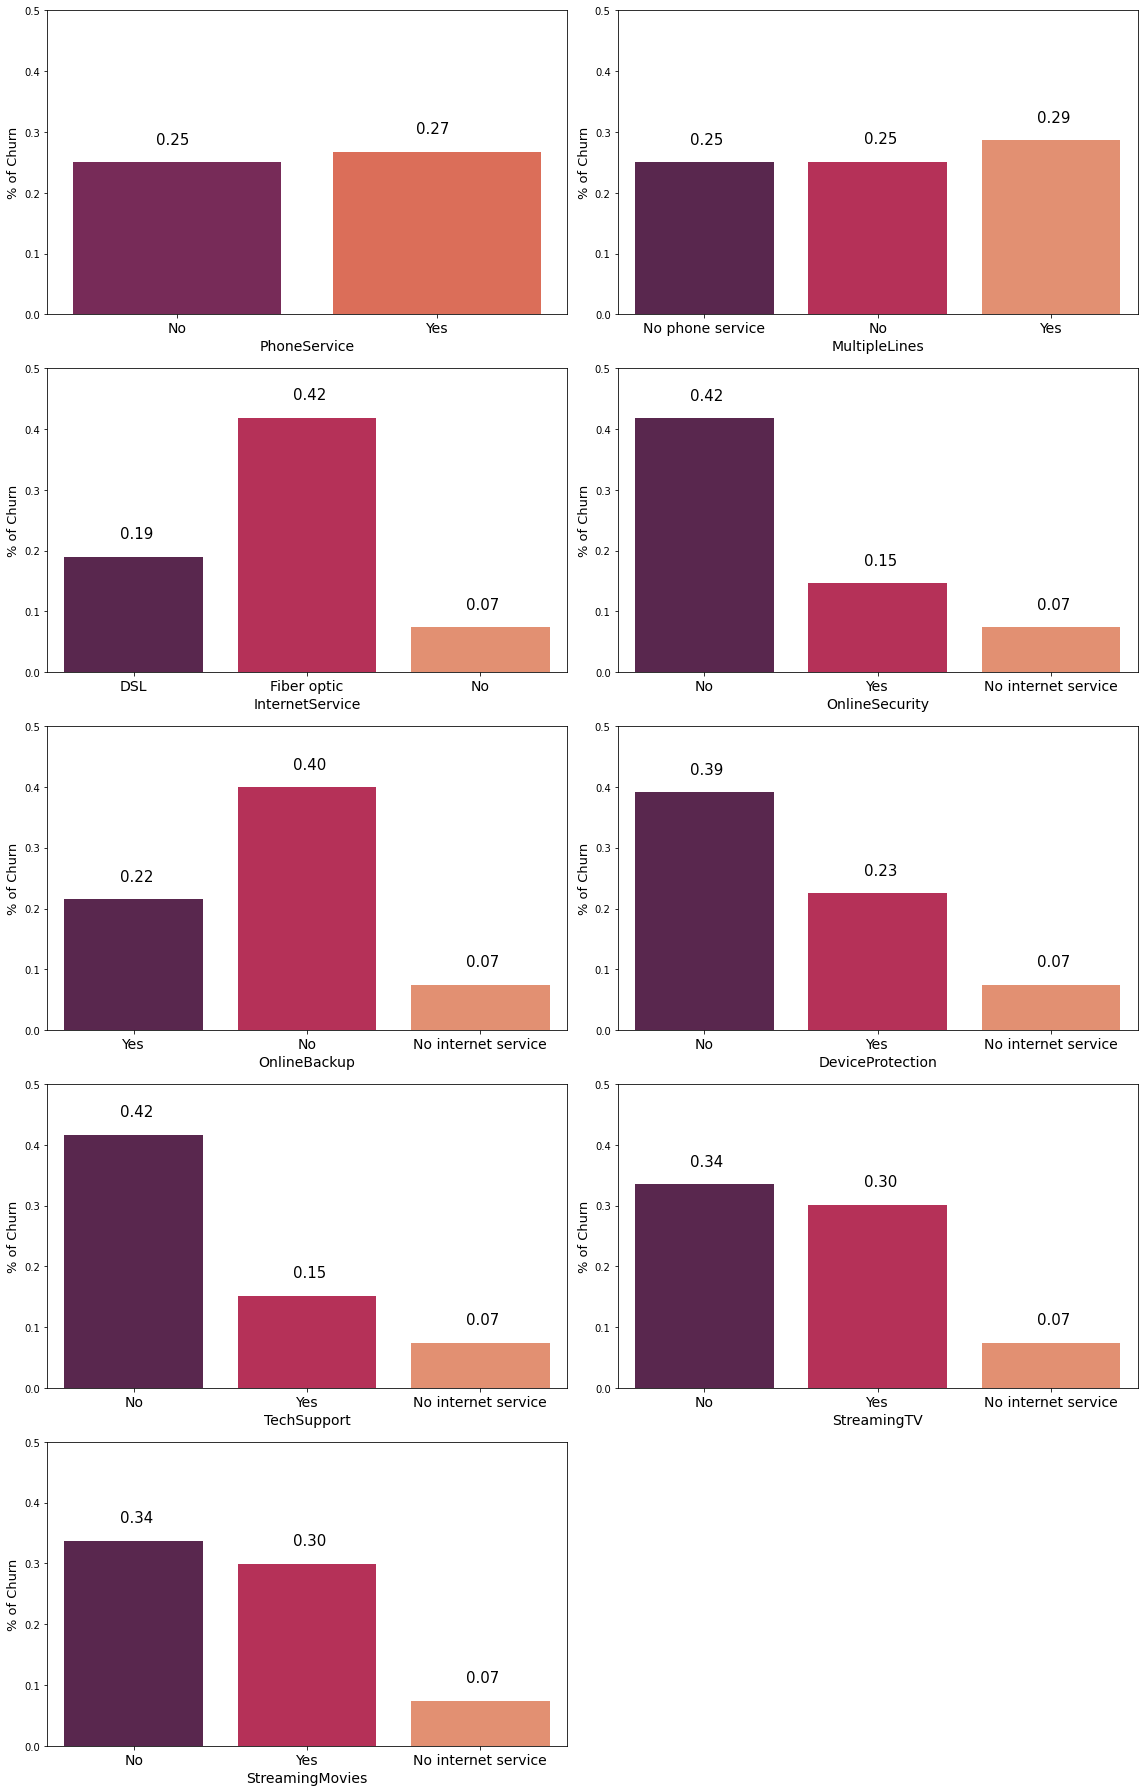

In [ ]:
plt.figure(figsize=(16,25))

for i,col in enumerate(serv_features):    
    plt.subplot(5,2,i + 1)
    
    ax = sns.barplot(x = col, y = "Churn", data = data2, palette = 'rocket', ci = None)

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("% of Churn", fontsize= 13)
    plt.ylim(0,0.5)
    plt.xticks(fontsize= 14)

    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.32, p.get_height()+0.03),fontsize=15)

plt.tight_layout()

plt.show()

1. We can actually see, that the service can really affect the probability of churn.
2. The highest percentage of churn, with over 40%, is from customers with fiber optic internet. Fiber optic tends to be faster than DSL internet, but their subscription is usually more expensive as well.
3. Clients with online security churn less than those without it.
4. Customers with no tech support tend to churn more often than those with tech support.